13 task

(a) Using the normal() method of your random number generator, create a vector x containing 100 observations drawn from a normal distribution with mean 0 and variance 1. This represents a feature X.

(b) Using the normal() method, create a vector eps containing 100 observations drawn from a normal distribution with mean 0 and variance 0.25.

(c) Using x and eps, generate a vector y according to the model
Y = -1 + 0.5 * X + eps.

What is the length of the vector y? What are the values of beta0 and beta1 in this linear model?

In [18]:
import numpy as np
X = np.random.normal(loc = 0,scale=1,size=100)
Eps =  np.random.normal(loc = 0,scale=0.25,size=100)
Y = (-1 + 0.5*X + Eps)

Length of the vector Y is 100,because we sum 100 observations from both X and Eps arrays.
Beta0 is -1.
Beta1 is 0.5.

(d)Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

<function matplotlib.pyplot.show(close=None, block=None)>

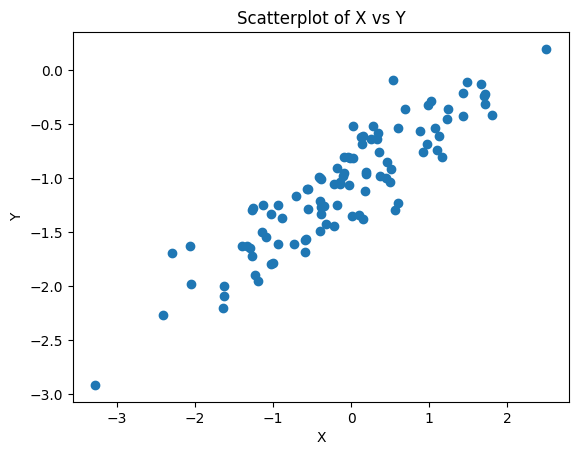

In [27]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show

we see clearly linear regression between x and y

(e)Fit a least squares linear model to predict y using x. Comment on the model obtained. How do β̂₀ and β̂₁ compare to β₀ and β₁?

In [29]:
import statsmodels.api as sm

X_design = sm.add_constant(X)
model = sm.OLS(Y, X_design).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     422.2
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.68e-37
Time:                        17:05:29   Log-Likelihood:                0.11444
No. Observations:                 100   AIC:                             3.771
Df Residuals:                      98   BIC:                             8.981
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0214      0.025    -41.609      0.0

we can see that our beta hats are really close to our real beta values,this is because we estimated our parameters by our given values from known linear model

(f)Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appropriate legend.

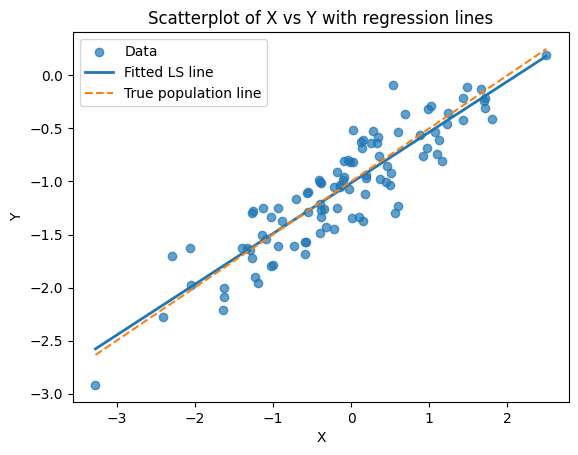

In [31]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X, Y, label="Data", alpha=0.7)
x_line = np.linspace(min(X), max(X), 100)
y_hat = -1.0135 + 0.4783 * x_line
plt.plot(x_line, y_hat, label="Fitted LS line", linewidth=2)

y_true = -1 + 0.5 * x_line
plt.plot(x_line, y_true, label="True population line", linestyle="--")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y with regression lines")
plt.legend()
plt.show()


(g)Now fit a polynomial regression model that predicts y using x and x². Is there evidence that the quadratic term improves the model fit? Explain your answer.


In [32]:
X2 = X**2

X_poly = np.column_stack((X, X2))
X_poly = sm.add_constant(X_poly)

model_poly = sm.OLS(Y, X_poly).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     210.8
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           4.86e-36
Time:                        17:05:41   Log-Likelihood:                0.48137
No. Observations:                 100   AIC:                             5.037
Df Residuals:                      97   BIC:                             12.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0075      0.030    -34.106      0.0

No,it doesnt improve model at all.
First of all we can look at p-value of x2 so it is 0.962 which is a way bigger than 5%,so we cant be sure on its statistically significance.
Secondly,we can look at overall R2 value of coefficient of determination which is not changed after adding X2 which means it doesnt have impact.

In [ ]:
ci = model.conf_int(alpha=0.05)   

beta0_CI = tuple(ci[0])           
beta1_CI = tuple(ci[1])          

print("CI beta0:", beta0_CI)
print("CI beta1:", beta1_CI)
#confidence intervals for regular one

CI beta0: (np.float64(-1.0700686823115153), np.float64(-0.9726447229497128))
CI beta1: (np.float64(0.4373367905250253), np.float64(0.5308452598447967))


(h)Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

abc

In [34]:
Eps =  np.random.normal(loc = 0,scale=0.1,size=100)
Y = (-1 + 0.5*X + Eps)

(d)

<function matplotlib.pyplot.show(close=None, block=None)>

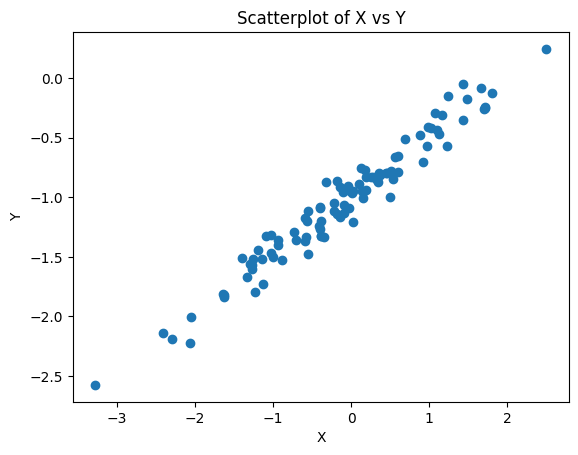

In [35]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show

(e)

In [37]:
model = sm.OLS(Y, X_design).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     2131.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           2.67e-68
Time:                        17:06:22   Log-Likelihood:                 78.853
No. Observations:                 100   AIC:                            -153.7
Df Residuals:                      98   BIC:                            -148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9858      0.011    -88.262      0.0

(f)

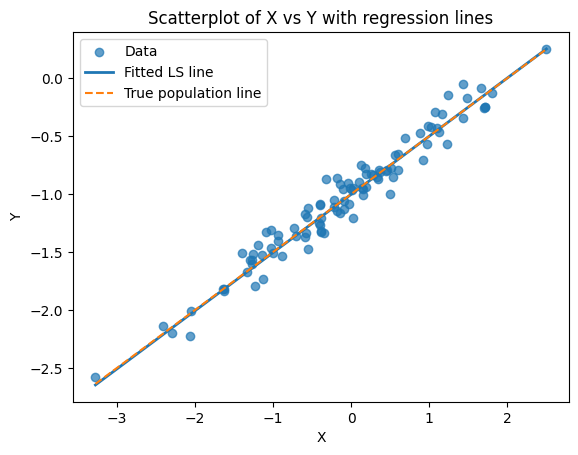

In [38]:
plt.scatter(X, Y, label="Data", alpha=0.7)
x_line = np.linspace(min(X), max(X), 100)
y_hat = -1.0027 + 0.5019 * x_line
plt.plot(x_line, y_hat, label="Fitted LS line", linewidth=2)

y_true = -1 + 0.5 * x_line
plt.plot(x_line, y_true, label="True population line", linestyle="--")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y with regression lines")
plt.legend()
plt.show()


We reduced variance so it means that our error is lower and model's fit is better.We can see it from R2 value which was 0.86 and now become 0.96

In [39]:
ci = model.conf_int(alpha=0.05)   

beta0_CI = tuple(ci[0])           
beta1_CI = tuple(ci[1])          

print("CI beta0:", beta0_CI)
print("CI beta1:", beta1_CI)

CI beta0: (np.float64(-1.0080137936135307), np.float64(-0.9636824691004731))
CI beta1: (np.float64(0.47363559261216087), np.float64(0.5161852315848443))


(i)Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

(a,b,c)

In [40]:
Eps =  np.random.normal(loc = 0,scale=0.4,size=100)
Y = (-1 + 0.5*X + Eps)

(d)

<function matplotlib.pyplot.show(close=None, block=None)>

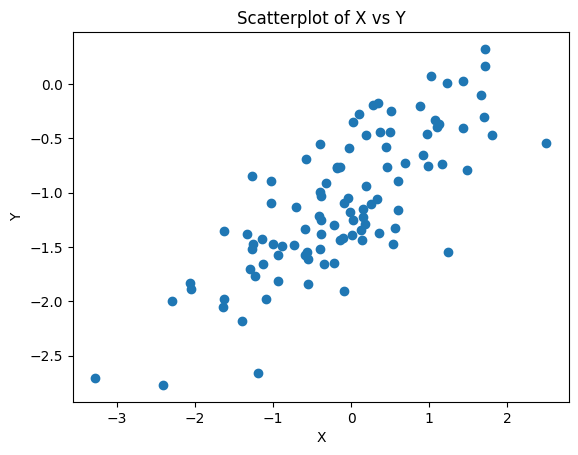

In [41]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y")
plt.show

(e)

In [42]:
model = sm.OLS(Y, X_design).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     152.3
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.14e-21
Time:                        17:06:40   Log-Likelihood:                -49.996
No. Observations:                 100   AIC:                             104.0
Df Residuals:                      98   BIC:                             109.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0443      0.041    -25.775      0.0

(f)

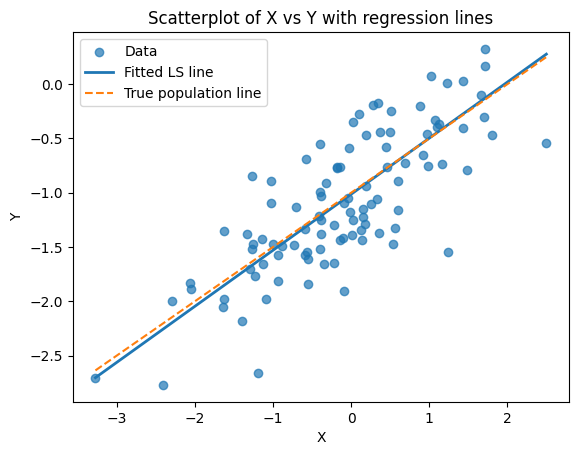

In [43]:
plt.scatter(X, Y, label="Data", alpha=0.7)
x_line = np.linspace(min(X), max(X), 100)
y_hat = -1.0136 + 0.5163 * x_line
plt.plot(x_line, y_hat, label="Fitted LS line", linewidth=2)

y_true = -1 + 0.5 * x_line
plt.plot(x_line, y_true, label="True population line", linestyle="--")

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot of X vs Y with regression lines")
plt.legend()
plt.show()


So as result we got more noise,so our R2 or coefficient of determination decreased to 0.664.

(j)What are the confidence intervals for β₀ and β₁ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [ ]:
ci = model.conf_int(alpha=0.05)   

beta0_CI = tuple(ci[0])           
beta1_CI = tuple(ci[1])          

print("CI beta0:", beta0_CI)
print("CI beta1:", beta1_CI)


[[-1.12468447 -0.96388277]
 [ 0.40268212  0.55702116]]
CI beta0: (np.float64(-1.1246844653376922), np.float64(-0.9638827698115068))
CI beta1: (np.float64(0.4026821226320684), np.float64(0.5570211631635383))


By comparing the confidence intervals, we observe that their width depends on the amount of noise in the data. The less noisy data set produces the narrowest confidence intervals, while the noisiest data set results in the widest intervals. This indicates that higher noise increases the uncertainty of the coefficient estimates.